In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Question 1 - A

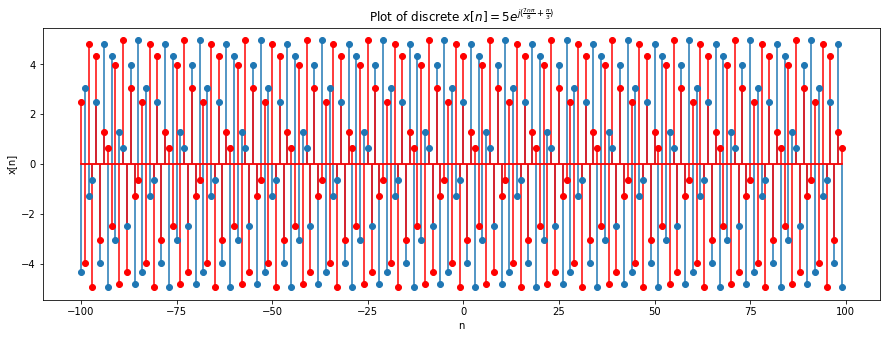

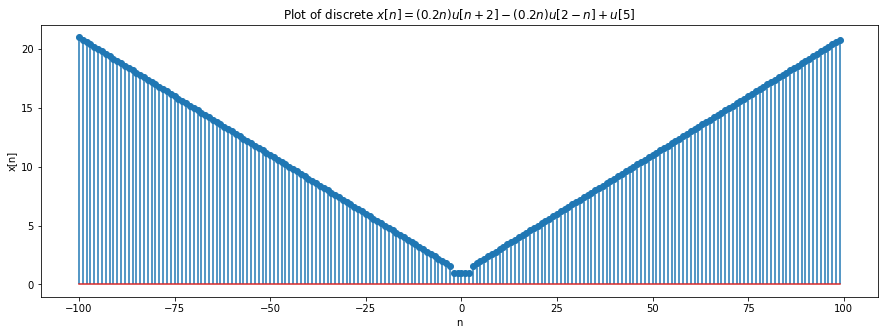

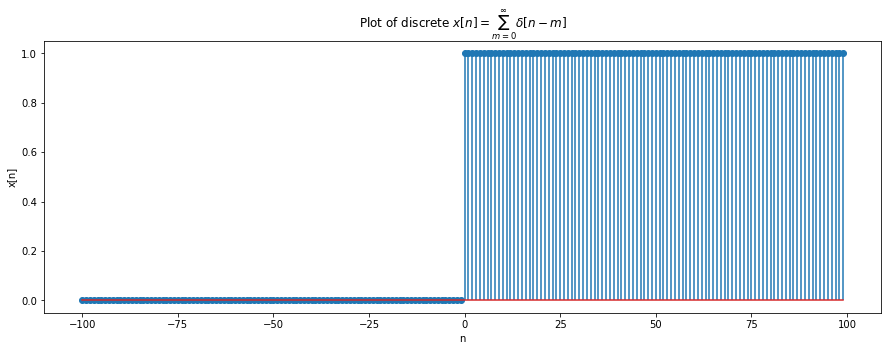

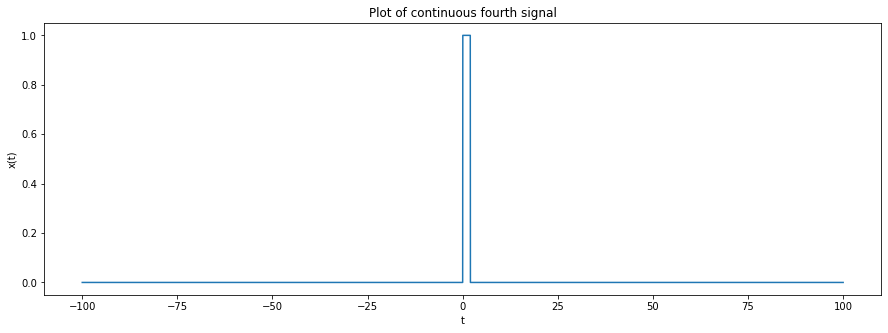

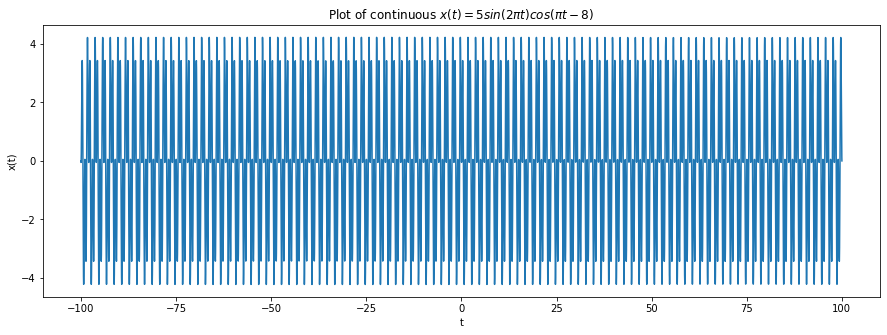

In [16]:
n = np.arange(-100,100)

u_ = lambda n : int(n >= 0)
u = np.vectorize(u_)

imp_ = lambda n : int(n == 0)
imp = np.vectorize(imp_)

def plot_discrete(fn, fn_str):
    plt.figure(figsize=(15, 5))
    plt.xlabel("n")
    plt.ylabel("x[n]")
    plt.title(fr'Plot of discrete {fn_str}')
    plt.stem(n, np.real(fn(n)))
    if np.imag(fn(n)).all() != 0:
        lines = plt.stem(n, np.imag(fn(n)))
        plt.setp(lines, color='r')
    plt.show()

x1 = lambda n : 5 * np.exp(1j * ((7 * n * np.pi / 8) + np.pi / 3))
x1_str = r'$x[n] = 5e^{j(\frac{7n\pi}{8}+\frac{\pi}{3})}$'
plot_discrete(x1, x1_str)

x2 = lambda n : (0.2 * n) * u(n + 2) - (0.2 * n) * u(2 - n) + u(5)
x2_str = r'$x[n] = (0.2n)u[n+2]-(0.2n)u[2 - n] + u[5]$'
plot_discrete(x2, x2_str)

x3 = lambda n : u(n)
x3_str = r'$x[n] = \sum_{m=0}^{\infty }\delta[n-m]$'
plot_discrete(x3, x3_str)

t = np.linspace(-100, 100, 10000)

def plot_continuous(fn, fn_str):
    plt.figure(figsize=(15, 5))
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.title(fr'Plot of continuous {fn_str}')
    plt.plot(t, fn(t))
    plt.show()

def x4(t):
    if t >= -1 and t <= 0:
        return t + 1
    if t >= 0 and t <= 2:
        return 1
    if t >= 2 and t <= 3:
        return -t + 3
    return 0
x4 = np.vectorize(x4)
x4_str = 'fourth signal'
plot_continuous(x4, x4_str)

x5 = lambda t: 5 * np.sin(2 * np.pi * t) * np.cos(np.pi * t - 8)
x5_str = r'$x(t) = 5sin(2\pi t)cos(\pi t - 8)$'
plot_continuous(x5, x5_str)

# Question 1 - B

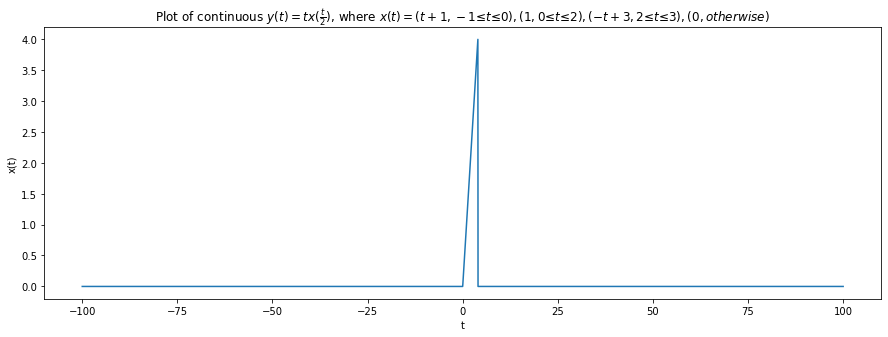

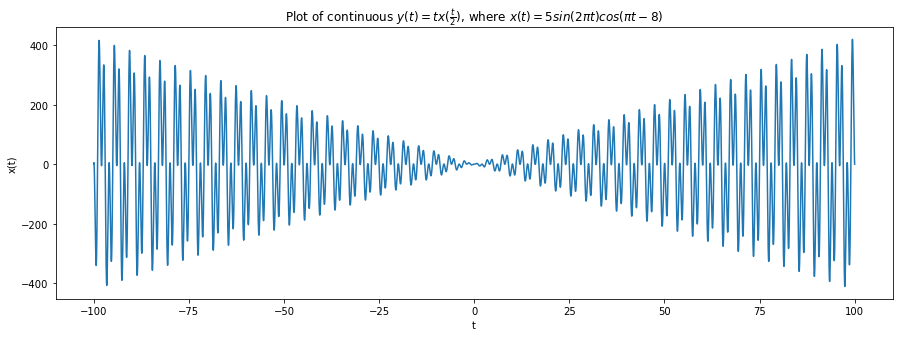

In [17]:
x4_2 = lambda t: t * x4(t / 2)
x4_2_str = r'$y(t) = tx(\frac{t}{2})$, where $x(t) = (t+1, -1≤t≤0), (1, 0≤t≤2), (-t+3, 2≤t≤3), (0, otherwise)$'
plot_continuous(x4_2, x4_2_str)

x5_2 = lambda t: t * x5(t / 2)
x5_2_str = r'$y(t) = tx(\frac{t}{2})$, where $x(t) = 5sin(2\pi t) cos(\pi t - 8)$'
plot_continuous(x5_2, x5_2_str)

# Question 1 - C

Sum for first discrete signal:


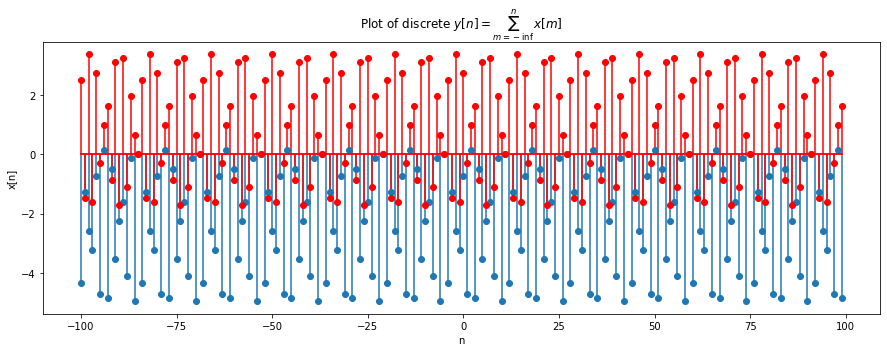

Sum for second discrete signal:


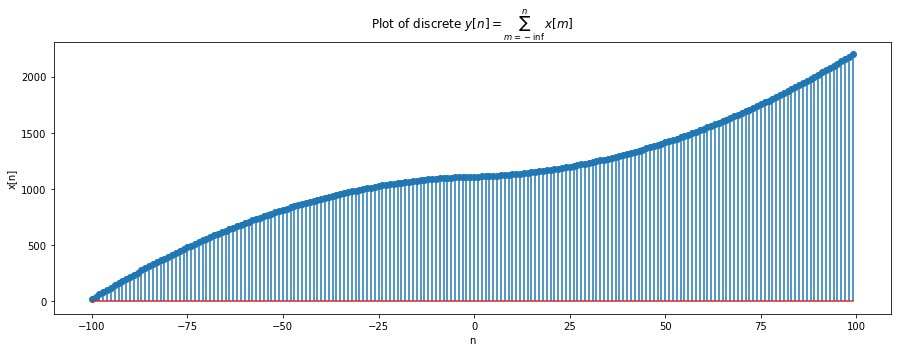

Sum for third discrete signal:


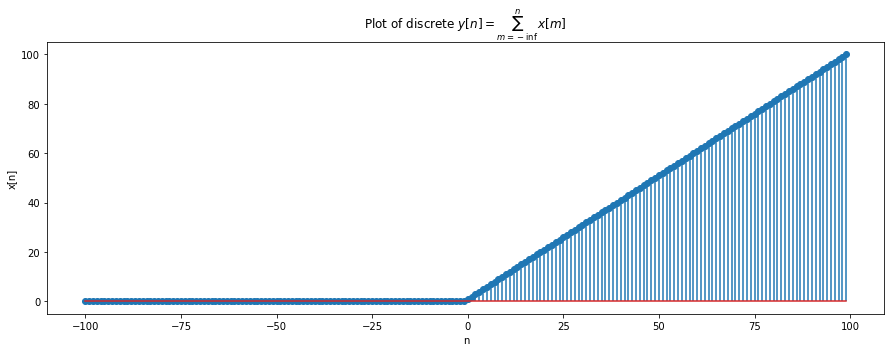

In [18]:
def plot_discrete_sum(fn, fn_label):
    sum = {}
    for i in range(-100, 101):
        sum[i] = fn(i) + sum.get(i - 1, 0)
    new_fn = lambda n: sum[n]
    new_fn = np.vectorize(new_fn)
    plot_discrete(new_fn, fn_label)

label = r'$y[n] = \sum_{m=-\inf}^{n}x[m]$'
print('Sum for first discrete signal:')
plot_discrete_sum(x1, label)
print('Sum for second discrete signal:')
plot_discrete_sum(x2, label)
print('Sum for third discrete signal:')
plot_discrete_sum(x3, label)

##  Question 4

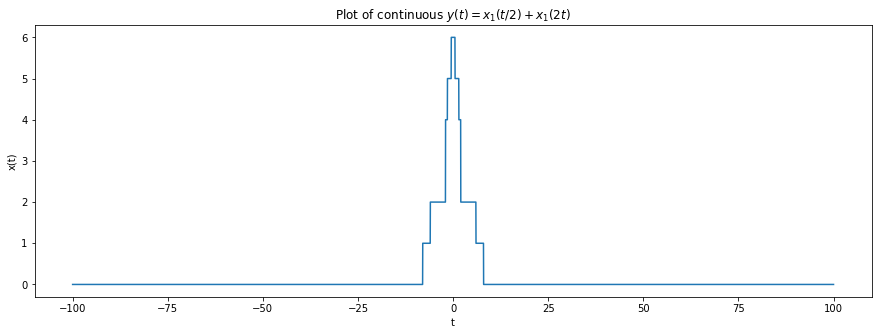

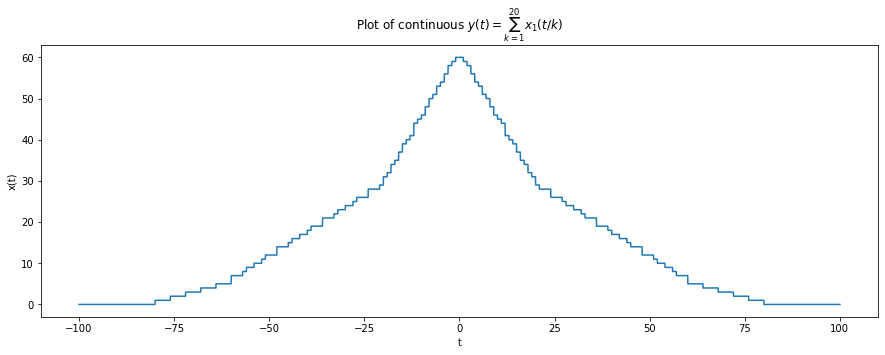

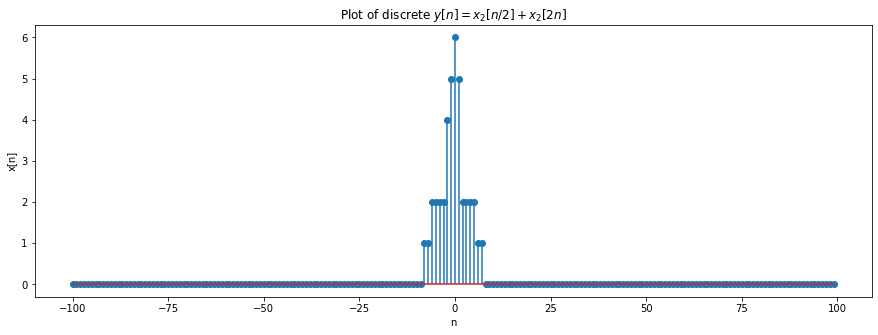

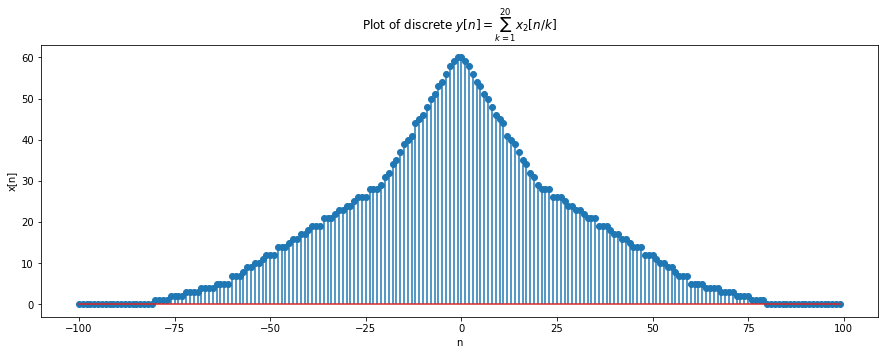

In [19]:
signal = lambda t: u(t+4) - u(t-4) + u(t+3) - u(t-3) + u(t+1) - u(t-1)

y_1 = lambda t: signal(t/2) + signal(2*t)
plot_continuous(y_1, '$y(t) = x_1(t/2) + x_1(2t)$')

def y_2(t):
    sum = 0
    for k in range(1, 21):
        sum += signal(t/k)
    return sum
plot_continuous(y_2, '$y(t) = \sum_{k=1}^{20}x_1(t/k)$')

y_3 = lambda n: signal(n/2) + signal(2*n)
plot_discrete(y_3, '$y[n] = x_2[n/2] + x_2[2n]$')

def y_4(n):
    sum = 0
    for k in range(1, 21):
        sum += signal(n/k)
    return sum
plot_discrete(y_4, '$y[n] = \sum_{k=1}^{20}x_2[n/k]$')